In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pathlib
import os
import copy
import datetime
import time
# sklearn?

import seaborn as sns
sns.set_style()

In [3]:
data=pd.read_csv("Data\Preprocessed_Data_with_Label.csv", sep=',',encoding='utf8')

In [27]:
ponderated_df=data.copy(deep=True)

for i in range (101, 317):
    for column in data.columns:
        if ("{}".format(i) in column)and ("ANSWER" in column):
            new_column=data[column]*data["ANSCOUNT_{}".format(i)] #check the syntax
            ponderated_df[column]=new_column

In [32]:
want_leave = data[data['ANSWER1_163']>40]

In [33]:
len(ponderated_df['DEMCODE'].unique()) == len(want_leave['DEMCODE'].unique())

True

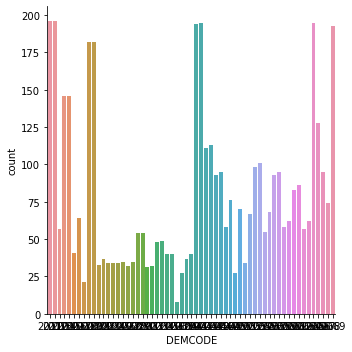

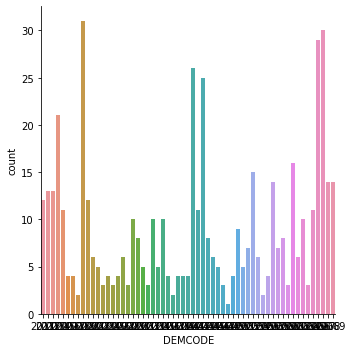

In [43]:
sns.catplot(data=data, x='DEMCODE', kind='count')
sns.catplot(data=want_leave, x='DEMCODE', kind='count')

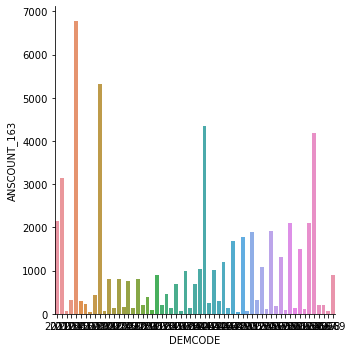

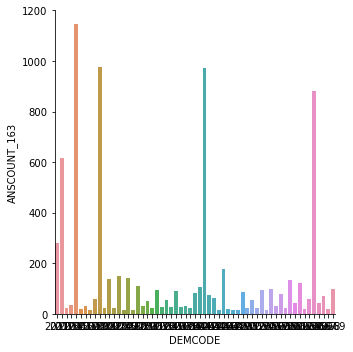

In [42]:
sns.catplot(data=data, x='DEMCODE', y='ANSCOUNT_163', kind='bar', ci=None)
sns.catplot(data=want_leave, x='DEMCODE',y='ANSCOUNT_163', kind='bar', ci=None)

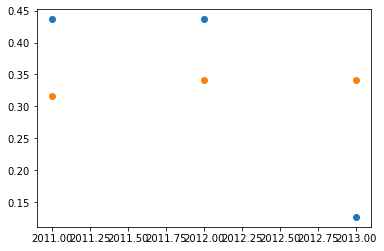

In [35]:
count = [data[data['DEMCODE']==2011]['DEMCODE'].count(),data[data['DEMCODE']==2012]['DEMCODE'].count(),data[data['DEMCODE']==2013]['DEMCODE'].count()]
count_bis = [want_leave[want_leave['DEMCODE']==2011]['DEMCODE'].count(),want_leave[want_leave['DEMCODE']==2012]['DEMCODE'].count(),want_leave[want_leave['DEMCODE']==2013]['DEMCODE'].count()]
plt.scatter([2011, 2012, 2013], count/sum(count))
plt.scatter([2011, 2012, 2013], count_bis/sum(count_bis))

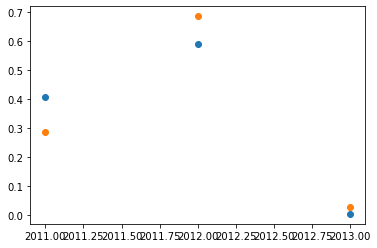

In [38]:
count = [data[data['DEMCODE']==2011]['ANSCOUNT_163'].sum(),data[data['DEMCODE']==2012]['ANSCOUNT_163'].sum(),data[data['DEMCODE']==2013]['ANSCOUNT_163'].sum()]
count_bis = [want_leave[want_leave['DEMCODE']==2011]['ANSCOUNT_163'].sum(),want_leave[want_leave['DEMCODE']==2012]['ANSCOUNT_163'].sum(),want_leave[want_leave['DEMCODE']==2013]['ANSCOUNT_163'].sum()]
plt.scatter([2011, 2012, 2013], count/sum(count))
plt.scatter([2011, 2012, 2013], count_bis/sum(count_bis))